In [9]:
import gym 
import numpy as np
#Just load and check once
env = gym.make("FrozenLake-v0")
env.reset()
env.render()
import matplotlib.pyplot as plt


SFFF
FHFH
FFFH
HFFG


In [11]:
# S is the initial stage
# G is the Goal 
# F is frozen part of the lake we can walk over
# H is the hole


# Lets look at the action space and the observation space
print("Action space: ", env.action_space)
print("Observation space: ", env.observation_space)

Action space:  Discrete(4)
Observation space:  Discrete(16)


In [12]:
SZ_ACTION_SPACE = env.action_space.n
SZ_OBS_SPACE = env.observation_space.n
print("Size of Action Space is ",SZ_ACTION_SPACE)
print("Size of Observation space is ",SZ_OBS_SPACE)

Size of Action Space is  4
Size of Observation space is  16


In [13]:
#From the documentation 
actions = {
    'Left': 0,
    'Down': 1,
    'Right': 2, 
    'Up': 3
}

In [14]:
def epsilonGreedyExplore(env, state, Q_table, e, episodes):
    prob = 1 - e / episodes
    if np.random.rand() < prob:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q_table[state, :])
    return action

In [15]:
def Qlearning(
    env, alpha, gamma, episodes=5000, evaluate_policy=True
    ):
    # get size of state and action space
    num_state = env.observation_space.n
    num_action = env.action_space.n

    # init
    success_rate = []
    policy = np.zeros(num_state, dtype=int)
    Q_table = np.random.rand(num_state, num_action)

    for i in range(episodes):
        state = env.reset()
        done = False
        while not done:
            action = epsilonGreedyExplore(env, state, Q_table, i, episodes)
            new_state, reward, done, _ = env.step(action)
            Q_table[state][action] += alpha * (reward + gamma * max(Q_table[new_state, :]) - Q_table[state][action])
            state = new_state
        for s in range(num_state):
            policy[s] = np.argmax(Q_table[s, :])
        if evaluate_policy:
            if i % 100 == 0:
                success_rate.append(testPolicy(policy))
    return policy, success_rate

In [16]:
def testPolicy(policy, trials=100):
    """
    Get the average rate of successful episodes over given number of trials
    : param policy: function, a deterministic policy function
    : param trials: int, number of trials
    : return: float, average success rate
    """
    env = gym.make("FrozenLake-v0")
    env.reset()
    success = 0

    for _ in range(trials):
        done = False
        state = env.reset()
        while not done:
            action = policy[state]
            state, _, done, _ = env.step(action)
            if state == 15:
                success += 1

    avg_success_rate = success / trials
    return avg_success_rate

In [17]:
def plot(success_rate, title):
    """
    Plots for success rate over every iteration
    :param success_rate: list, a list of success rate
    :param title: str, plot title
    """
    plt.figure()
    plt.plot(success_rate)
    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel("Success rate")
    plt.savefig(title + ".png", dpi=150)
    plt.show()

alpha = 0.05, gamma = 0.99: 67.0%


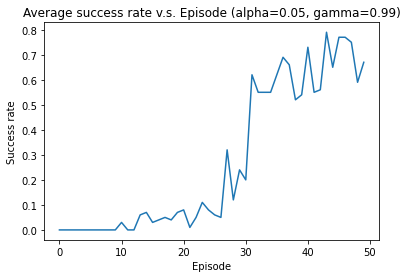

alpha = 0.1, gamma = 0.99: 65.0%


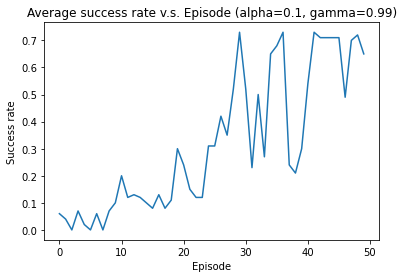

alpha = 0.25, gamma = 0.99: 67.0%


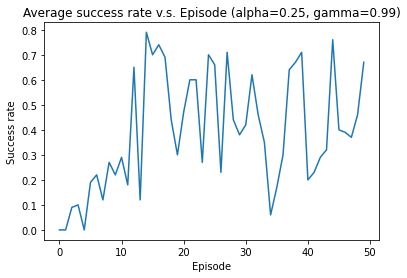

alpha = 0.5, gamma = 0.99: 0.0%


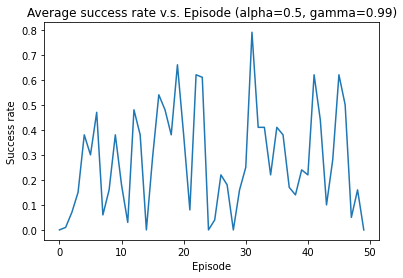

alpha = 0.05, gamma = 0.9: 3.0%


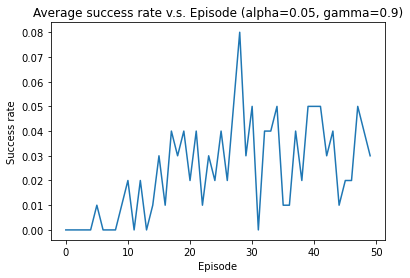

alpha = 0.05, gamma = 0.95: 3.0%


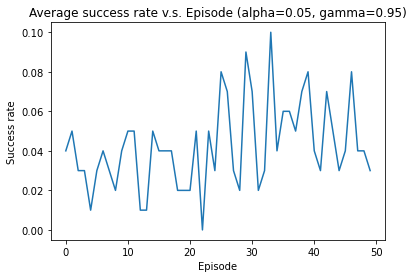

alpha = 0.05, gamma = 0.99: 80.0%


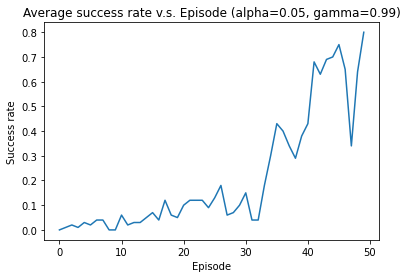

In [19]:
env = gym.make("FrozenLake-v0")
env.reset()

# test different alpha with fixed gamma(0.99)
alphas = [0.05, 0.1, 0.25, 0.5]
for alpha in alphas:
    _, success_rate = Qlearning(env, alpha=alpha, gamma=0.99)
    print(
        "alpha = {}, gamma = {}: {:.1f}%".format(
            alpha, 0.99, success_rate[-1] * 100
        )
    )
    plot(
        success_rate,
        "Average success rate v.s. Episode (alpha={}, gamma=0.99)".format(alpha),
    )

# test different gamma with fixed alpha(0.05)
gammas = [0.9, 0.95, 0.99]
for gamma in gammas:
    _, success_rate = Qlearning(env, alpha=0.05, gamma=gamma)
    print(
        "alpha = {}, gamma = {}: {:.1f}%".format(
            0.05, gamma, success_rate[-1] * 100
        )
    )
    plot(
        success_rate,
        "Average success rate v.s. Episode (alpha=0.05, gamma={})".format(gamma),
    )